In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

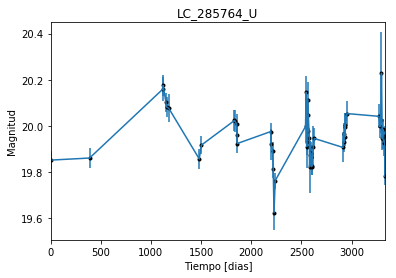

In [2]:
data = np.genfromtxt('LC_285764_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_285764_U')
plt.savefig("LC_285764_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

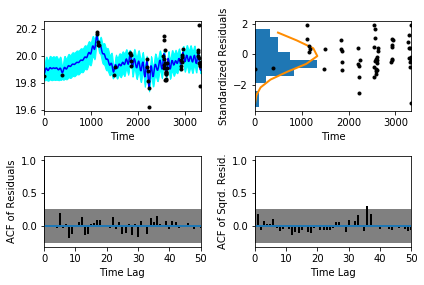

In [5]:
sample.assess_fit()

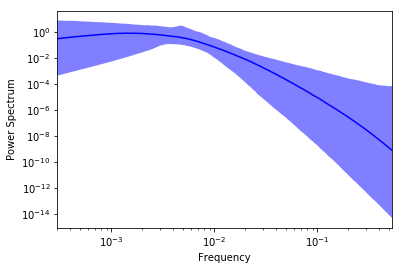

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

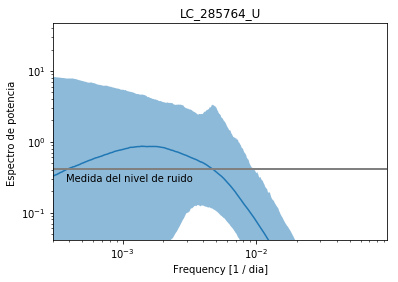

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_U')

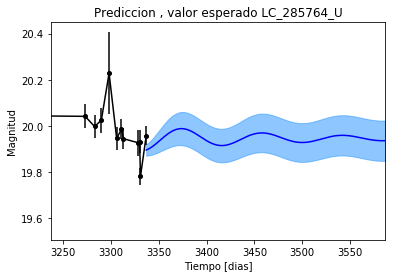

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_U')

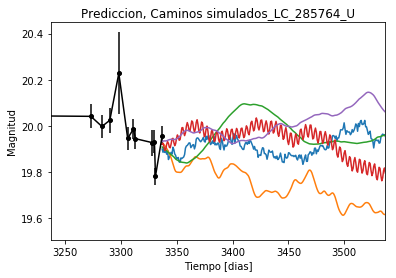

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


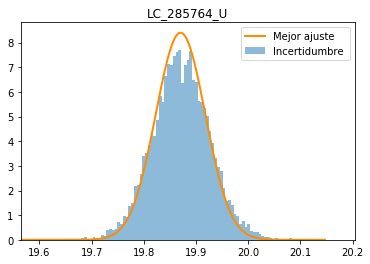

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_U')
plt.savefig("Mejor_ajuste_LC_285764_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_U')

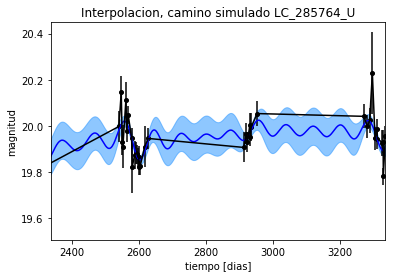

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_U')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_U')

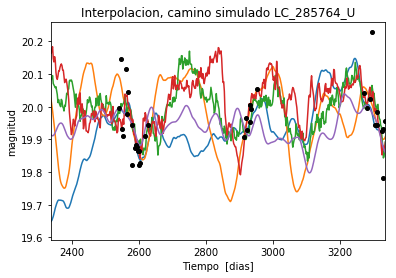

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 379.29746595
Median: 0.0101879857361
Standard deviation: 0.190863447143
68% credibility interval: [ 0.00125642  0.14442567]
95% credibility interval: [  4.10887855e-04   7.75218628e-01]
99% credibility interval: [  3.23391510e-04   1.00454396e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 322.079499976
Median: 0.00386198096964
Standard deviation: 0.117434892361
68% credibility interval: [ 0.00082411  0.03794729]
95% credibility interval: [  3.56918718e-04   4.05989142e-01]
99% credibility interval: [  3.12605838e-04   8.84180593e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 783.442248179
Median: 0.0114819090121
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1652.63694327
Median: 88.910094016
Standard deviation: 1.64906069527
68% credibility interval: [ 87.08959877  90.11473003]
95% credibility interval: [ 84.56699983  90.88046039]
99% credibility interval: [ 82.43003606  91.20794008]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1102.89189049
Median: 0.568949301018
Standard deviation: 2.21498149013
68% credibility interval: [ 0.07908666  3.66940778]
95% credibility interval: [ 0.01595616  7.55906138]
99% credibility interval: [  9.41206835e-03   1.11215313e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 404.962263874
Median: 0.256531765324
Standard deviation: 10.0981992235
68% credibility interval: [ 0.01160353  8.08352756]
95% credibility interval: [  2.9

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 26546.7309943
Median: 2.43647337016e+14
Standard deviation: 7.59954811117e+149
68% credibility interval: [  1.13251219e-50   2.27529033e+94]
95% credibility interval: [  3.41413090e-146   2.25943585e+119]
99% credibility interval: [  7.68920532e-186   2.56064685e+148]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3226.01863576
Median: 19.9517675482
Standard deviation: 0.0344759742522
68% credibility interval: [ 19.92227261  19.98343801]
95% credibility interval: [ 19.88562349  20.02078497]
99% credibility interval: [ 19.84998137  20.05134141]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 241.593647127
Median: 0.0101543186225
Standard deviation: 0.251949553954
68% credibility interval: [ 0.          0.33426404]
95% credibility interval: [ 0.          0.92636242]
99% credibility interval: [ 0.          1.03939588]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 241.593647127
Median: 0.0101543186225
Standard deviation: 0.251949553954
68% credibility interval: [ 0.          0.33426404]
95% credibility interval: [ 0.          0.92636242]
99% credibility interval: [ 0.          1.03939588]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 816.222004086
Median: 0.0
Standard deviation: 0.00209042673156
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1652.63694327
Median: 88.910094016
Standard deviation: 1.64906069527
68% credibility interval: [ 87.08959877  90.11473003]
95% credibility interval: [ 84.56699983  90.88046039]
99% credibility interval: [ 82.43003606  91.20794008]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2516.01874771
Median: 0.0114533721929
Standard deviation: 0.00813212529988
68% credibility interval: [ 0.00743865  0.01900345]
95% credibility interval: [ 0.00506921  0.03321888]
99% credibility interval: [ 0.0041148  0.0495678]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2507.81838931
Median: 1.01981145928
Standard deviation: 0.167032795561
68% credibility interval: [ 0.8813149   1.19712287]
95% credibility interval: [ 0.75381047  1.41173739]
99% credibility interval: [ 0.68912676  1.57760775]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1271.3577007
Median: 4.53456531278e-18
Standard deviation: 0.118160012136
68% credibility interval: [  1.04787438e-97   3.05533743e-03]
95% credibility interval: [  1.07821986e-122   7.75099352e-002]
99% credibility interval: [  2.43588130e-153   5.32488602e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 379.29746595
Median: (-0.0640130022868-0.0317298573211j)
Standard deviation: 1.98599782713
68% credibility interval: [-0.90745325+0.j         -0.00789434-0.02343777j]
95% credibility interval: [ -4.87084229e+00+0.j          -2.58168453e-03-0.07331021j]
99% credibility interval: [ -6.31173585e+00-6.30813635j  -2.03192878e-03-0.05799155j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 322.079499976
Median: (-0.0242655420851+0.0870709630807j)
Standard deviation: 1.74656200572
68% credibility interval: [-0.23842984+2.24104166j -0.00517802+0.j        ]
95% credibility interval: [ -2.55090501e+00+3.59287033j  -2.24258645e-03+2.79674378j]
99% credibility interval: [ -5.55547051e+00+2.63877971j  -1.96416041e-03+0.j        ]
P